## Introduction to Stats in Python Studio

We are going to be working with this [dataset](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) from Kaggle.  No need to download, as it is included in the git repository you just cloned.
<br>

Heart Disease is the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.
<br>

Heart failure is a common event caused by heart disease and this dataset contains 12 features that can be used to predict mortality by heart failure. You are tasked to look at two particular variables and record your observations about their usefulness for predicting the probability of heart failure.
<br>

In section one, you will be asked to run some simple EDA and apply statistical terminology to describe each variable in more detail.  Section two will explore what the distribution of your variables looks like. Finally, in section three you will be asked to make some inferences about your variables and if you feel they are good indicators of predicting heart failure.
<br>

Answer the questions and record your observations in the space provided. Feel free to add more code blocks if you'd like.
<br>



In [1]:
# Import libries need with alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


# Set style and font size
sns.set_style('darkgrid')
sns.set(font_scale=1.5)


#Multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last_expr"   to restore default



In [2]:
# Read in data to a dataframe
df=pd.read_csv('heart3.csv')

## Section 1: First look at the data:

Run some simple EDA and look at the data and your variables. Answer the following questions.

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Which of our columns are catogorical data?

* Categorical variables are also known as discrete or qualitative variables. Categorical variables can be further categorized as either nominal, ordinal or dichotomous.
* Categorical variables, aka discrete variables. These come in only a fixed number of values – like dead/alive, obese/overweight/normal/underweight, Apgar score.

<font color=darkred> Death event, smoking, sex, diabetes, anemia,high blood pressure</font>
<BR><BR><BR>
Which of our columns are continuous?
    
* Continuous variables are also known as quantitative variables. Continuous variables can be further categorized as either interval or ratio variables
    
* Continuous variables. These can have any value between a theoretical minimum and maximum, like birth weight, BMI, temperature, neutrophil count.
    
<font color=darkblue> age,creatinine_phosphokinase, ejection_fraction, platelets ,serum_creatinine, serum_sodium,  time</font>    
<BR><BR><BR>
    
    
**Categorical variable**
Categorical variables contain a finite number of categories or distinct groups. Categorical data might not have a logical order. For example, categorical predictors include gender, material type, and payment method.

**Discrete variable**
Discrete variables are numeric variables that have a countable number of values between any two values. A discrete variable is always numeric. For example, the number of customer complaints or the number of flaws or defects.

**Continuous variable**
Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payment is received.

6





In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Break into small groups, with each group choosing a different variable from group A and one from group B.  

 <BR>

* sex, anemia, diabetes, high_blood_preasure, smoking
* Ejection_fraction, creatinine_phosphokinase, age, serum_sodium, platelets
 

In [8]:
df['anaemia'].agg(['min', 'max','mean', 'std'])

df['age'].agg(['min', 'max','mean', 'std'])

min     0.000000
max     1.000000
mean    0.431438
std     0.496107
Name: anaemia, dtype: float64

min     40.000000
max     95.000000
mean    60.833893
std     11.894809
Name: age, dtype: float64

### Statistical interpretation of our data?
#### First Variable:
Mean, Min, Max, STD? Describe what this means.
min     0.000000
max     1.000000
mean    0.418060
std     0.494067
Name: diabetes, dtype: float64

min-no diabetes
max-diabetes
mean-less than 50% of the sample have diabetes
std The value is very close to the mean meaning the values of the dataset are fairly consistent (The standard deviation (SD) is a single number that summarizes the variability in a dataset. It represents the typical distance between each data point and the mean. Smaller values indicate that the data points cluster closer to the mean—the values in the dataset are relatively consistent. Conversely, higher values signify that the values spread out further from the mean. Data values become more dissimilar, and extreme values become more likely.)

<br><br><br>


#### Second Variable:
Mean, Min, Max, STD? Describe what this means.

min     40.000000
max     95.000000
mean    60.833893
std     11.894809
Name: age, dtype: float64

* minimum age-40
* max age-95
* average age-60/61
* std (A large value for standard deviation means that the data is spread far out, with some of it far away from the mean.  That is, on average, a given data point is far from the mean.
 A small value for standard deviation means that the data is clustered near the mean.  That is, on average, a given data point is close to the mean.
 A zero value for standard deviation means that all of the data has the same value (which is also the value of the mean).  This situation is rare, but it is possible.)

<br><br><br>

What could the numbers in our categorical data tell us?

<br><br><br>

Why might we want to keep our categorical data as 1's and 0's? Why may we want to use something like the code below to change it?



In [ ]:
#df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
#df['anaemia'] = df.anaemia.replace({1: "Yes", 0: "No"})
#df['diabetes'] = df.diabetes.replace({1: "Yes", 0: "No"})
#df['high_blood_pressure'] = df.high_blood_pressure.replace({1: "Yes", 0: "No"})
#df['smoking'] = df.smoking.replace({1: "Yes", 0: "No"})

#df['DEATH_EVENT'] = df.DEATH_EVENT.replace({1: "Died", 0: "Alive"})

## Section 2: Distribution of our data:

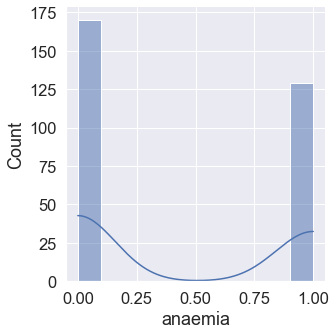

In [37]:
# Plot the distribution of your variable using distplot
sns.displot(df['anaemia'],kde=True)

In [27]:
df['age'].value_counts().sort_values(ascending=False)

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
40.000     7
72.000     7
42.000     7
85.000     6
62.000     5
52.000     5
68.000     5
61.000     4
73.000     4
59.000     4
49.000     4
51.000     4
46.000     3
64.000     3
82.000     3
90.000     3
69.000     3
57.000     2
67.000     2
60.667     2
78.000     2
44.000     2
77.000     2
95.000     2
54.000     2
66.000     2
48.000     2
41.000     1
79.000     1
81.000     1
86.000     1
43.000     1
47.000     1
87.000     1
56.000     1
94.000     1
Name: age, dtype: int64

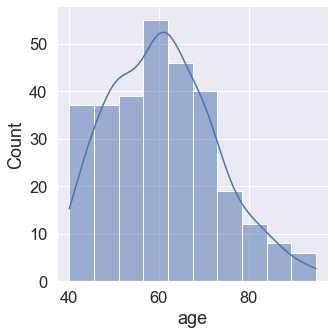

In [24]:
sns.displot(df['age'],kde=True)

<AxesSubplot:>

Text(0.5, 1.0, 'Anaemia')

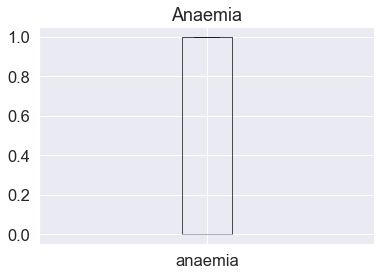

In [28]:
df.boxplot(column='anaemia', return_type='axes')
plt.title('Anaemia')
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'Age')

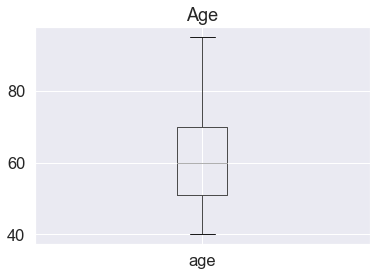

In [12]:
# Create boxplot to show distribution of variable
df.boxplot(column='age', return_type='axes')
plt.title('Age')
plt.show()

In [36]:
import plotly.express as px
fig = px.box(df, y="anaemia")
fig.show()

In [18]:
import plotly.express as px
fig = px.box(df, y="age")
fig.show()

In [19]:
# Feel free to add any additional graphs that help you answer the questions below.

In [29]:
# Another way to check the skewness of our variable
df['anaemia'].skew()
df['age'].skew()

#Age skew means the data is leaning towards to left of the mean

0.2782606644055605

0.42306190672863536

In [30]:
# Another way to check the kurtosis of our variable
df['anaemia'].kurtosis()

df['age'].kurtosis()

-1.9355630969858053

-0.18487053195417413

### Interpretation of how our data is distributed by variable?
Looking at the above graphs, what can you tell about the distribution of your variables?
<br><br><br><br><br>
What is the skewness and kurtosis of your variables.  What does this mean?<br>
<br><br><br><br><br>
What are some of the differences you note looking at a categorical variable vs a continuous variable?
<br><br><br><br><br>

## Section 3: Finding Correlations

Lets start by breaking our data into two.  

In [32]:
# splitting the dataframe into 2 parts
# on basis of ‘DEATH_EVENT’ column values
df_died = df[df['DEATH_EVENT'] == 1 ]
df_lived = df[df['DEATH_EVENT'] == 0 ]

In [ ]:
#df['diabetes'] = df.diabetes.replace({1: "Yes Diabetes", 0: "No Diabetes"})



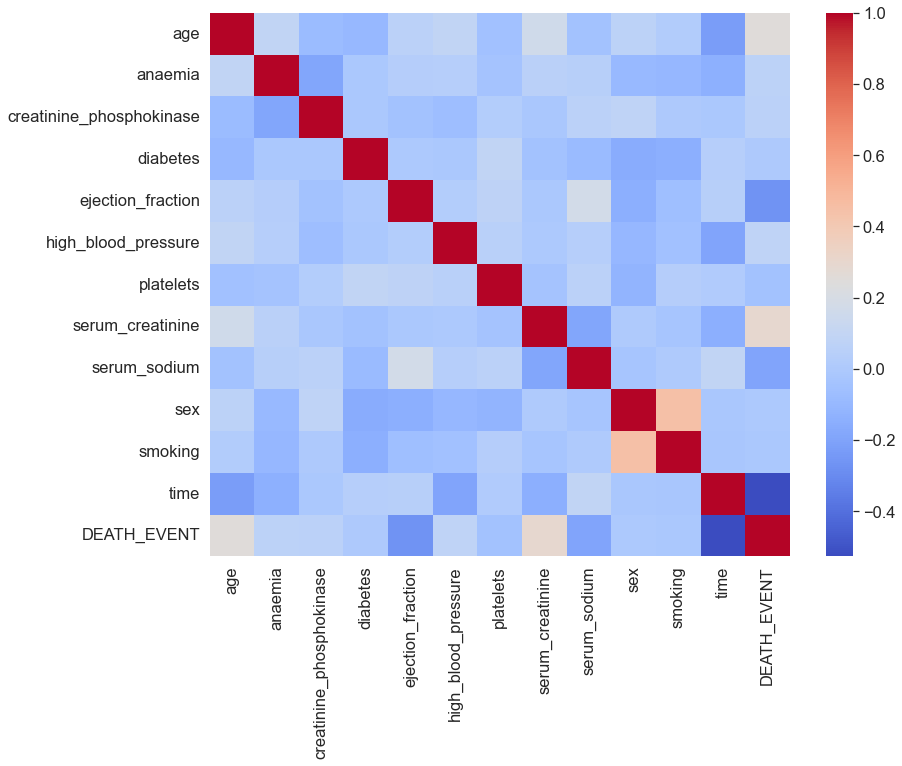

In [33]:
# Create tabular correlation matrix
corr = df.corr()
_, ax = plt.subplots(figsize=(13,10)) 



# Graph correlation matrix

_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')


# Red cells indicate positive correlation; blue cells indicate negative correlation; white cells indicate no correlation. 
# The darker the colors, the stronger the correlation (positive or negative) between those two variables.
# A value of -1 indicates the strongest possible negative correlation, meaning as one variable decreases the other increases.
# And a value of 1 indicates the opposite.

<AxesSubplot:xlabel='anaemia', ylabel='Density'>

<AxesSubplot:xlabel='anaemia', ylabel='Density'>

Text(0.5, 1.0, 'Chances of survival vs Variable')

[]

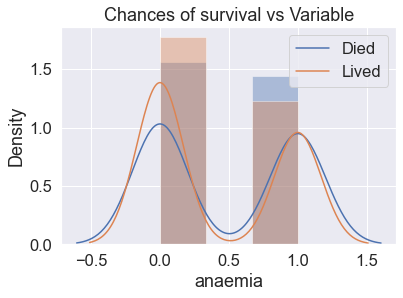

In [39]:
# Plot your variable based on if they died or lived

#df[['age','DEATH_EVENT']].corr()

sns.distplot(df_died['anaemia'])
sns.distplot(df_lived['anaemia'])
plt.title("Chances of survival vs Variable")
plt.legend(('Died','Lived'))
plt.plot()


<AxesSubplot:xlabel='age', ylabel='Density'>

<AxesSubplot:xlabel='age', ylabel='Density'>

Text(0.5, 1.0, 'Chances of survival vs Variable')

[]

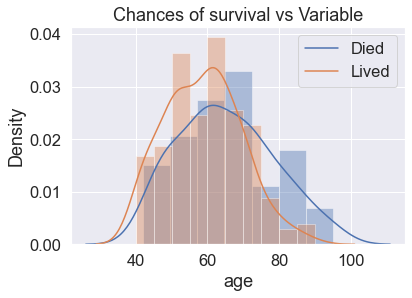

In [35]:
sns.distplot(df_died['age'])
sns.distplot(df_lived['age'])
plt.title("Chances of survival vs Variable")
plt.legend(('Died','Lived'))
plt.plot()

In [ ]:
# Feel free to add any additional graphs that help you answer the questions below.

#### What things can you infer if we consider our data a sample of the population, based on each of your variables.  
<br><br><br><br><br>
#### Do you think either of your variables is a good indicator for predicting Heart Failure, why or why not?  
<br><br><br><br><br>